<img src="ost_logo.png" width="240" height="240" align="right"/>
<div style="text-align: left"> <b> Machine Learning </b> <br> MSE FTP MachLe <br> 
<a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>

## Lab 9, A5: Illustration of prior and posterior Gaussian process for different kernels


__Multivariate Gaussian distributions__ are useful for modeling finite collections of real-valued variables because of their nice analytical properties. Gaussian processes $\mathcal{GP}$ are the extension of multivariate Gaussians to *infinite-sized collections of real-valued variables*. In particular, this extension will allow us to think of Gaussian processes as
distributions not just over random vectors but in fact __distributions over random functions__.

Unlike classical learning algorithm, Bayesian algorithms do not attempt to identify “best-fit” models of the data (or similarly, make “best guess” predictions for new test inputs). Instead, they compute __a posterior distribution over models__ (or similarly, compute posterior predictive distributions for new test inputs). These distributions provide a useful way to quantify our uncertainty in model estimates, and to exploit our knowledge of this uncertainty in order to make more robust predictions on new test points.



## Gaussian Process


A __stochastic process__ is a collection of random variables, $\left\lbrace f(x) : x \in \mathcal{X} \right\rbrace$, indexed by elements from some set $\mathcal{X}$, known as the index set. 

__A Gaussian process is a stochastic process such that any finite subcollection of random variables has a multivariate Gaussian distribution.__ In particular, a collection of random variables $\left\lbrace f(x) : x \in \mathcal{X} \right\rbrace$  is said to be drawn from a Gaussian process $\mathcal{GP}$ with mean function $m(·)$ and covariance function $k(·, ·)$ if for any finite set of elements $x_1, . . . , x_m \in \mathcal{X}$, the associated finite set of random variables $f(x_1), \dots, f(x_m)$ have distribution,



When we form a Gaussian process $\mathcal{GP}$ we assume data is *jointly Gaussian* with a particular mean and covariance,

$$
p(\mathbf{f}|\mathbf{X}) \sim \mathcal{N}(\mathbf{m}(\mathbf{X}), \mathbf{K}(\mathbf{X})),
$$

$$
\mathbf{f}  \sim \mathcal{GP}(\mathbf{m}(\mathbf{x}), \mathbf{k}(\mathbf{x,x'})),
$$

where the conditioning is on the inputs $\mathbf{X}$ which are used for computing the mean and covariance. For this reason they are known as mean and covariance functions. To make things clearer, let us assume, that the mean function $\mathbf{m}(\mathbf{X})$ is zero, i.e. the jointly Gaussian distribution is centered around zero.

In this case, the Gaussian process perspective takes the marginal likelihood of the data to be a joint Gaussian density with a covariance given by $\mathbf{K}$. So the model likelihood is of the form,
$$
p(\mathbf{y}|\mathbf{X}) = \frac{1}{(2\pi)^{\frac{n}{2}}|\mathbf{K}|^{\frac{1}{2}}} \exp\left(-\frac{1}{2}\mathbf{y}^\top \left(\mathbf{K}+\sigma^2 \mathbf{I}\right)^{-1}\mathbf{y}\right)
$$
where the input data, $\mathbf{X}$, influences the density through the covariance matrix, $\mathbf{K}$ whose elements are computed through the covariance function, $k(\mathbf{x}, \mathbf{x}^\prime)$.

This means that the negative log likelihood (the objective function) is given by,
$$
E(\boldsymbol{\theta}) = \frac{1}{2} \log |\mathbf{K}| + \frac{1}{2} \mathbf{y}^\top \left(\mathbf{K} + \sigma^2\mathbf{I}\right)^{-1}\mathbf{y}
$$
where the *parameters* of the model are also embedded in the covariance function, they include the parameters of the kernel (such as lengthscale and variance), and the noise variance, $\sigma^2$. These parameters are called *hyperparametres*. Often, they are specified as the logarithm of the hyperparameters and are then called *loghyperparameters*.



### Making Predictions - computing the posterior

We therefore have a probability density that represents *functions*. How do we make predictions with this density? The density is known as a process because it is *consistent*. By consistency, here, we mean that the model makes predictions for $\mathbf{f}$ that are unaffected by future values of $\mathbf{f}^*$ that are currently unobserved (such as test points). If we think of $\mathbf{f}^*$ as test points, we can still write down a joint probability density over the training observations, $\mathbf{f}$ and the test observations, $\mathbf{f}^*$. This joint probability density will be Gaussian, with a covariance matrix given by our covariance function, $k(\mathbf{x}_i, \mathbf{x}_j)$. 

$$
\begin{bmatrix}\mathbf{f} \\ \mathbf{f}^*\end{bmatrix} \sim \mathcal{N}\left(\mathbf{0}, \begin{bmatrix} \mathbf{K} & \mathbf{K}_\ast \\ \mathbf{K}_\ast^\top & \mathbf{K}_{\ast,\ast}\end{bmatrix}\right)
$$

where here $\mathbf{K}$ is the covariance computed between all the training points, $\mathbf{K}_\ast$ is the covariance matrix computed between the training points and the test points and $\mathbf{K}_{\ast,\ast}$ is the covariance matrix computed betwen all the tests points and themselves. 


#### Conditional Density

Just as in naive Bayes, we first define the **joint density**, $p(\mathbf{y}, \mathbf{X})$ and now we need to define __conditional distributions__ that answer particular questions of interest. In particular we might be interested in finding out the values of the function for the prediction function at the test data given those at the training data, $p(\mathbf{f}_*|\mathbf{f})$. Or if we include noise in the training observations then we are interested in the conditional density for the prediction function at the test locations given the training observations, $p(\mathbf{f}^*|\mathbf{y})$. 

As ever all the various questions we could ask about this density can be answered using the *sum rule* and the *product rule*. For the multivariate normal density the mathematics involved is that of *linear algebra*, with a particular emphasis on the *partitioned inverse* or [*block matrix inverse*](http://en.wikipedia.org/wiki/Invertible_matrix#Blockwise_inversion), but they are beyond the scope of this course, so you don't need to worry about remembering them or rederiving them. We are simply writing them here because it is this *conditional* density that is necessary for making predictions.

The conditional density is also a multivariate normal,
$$
p(\mathbf{f}^* | \mathbf{y}) \sim \mathcal{N}(\boldsymbol{\mu}_f,\mathbf{C}_f)
$$
with a mean given by
$$
\boldsymbol{\mu}_f = \mathbf{K}_*^\top \left[\mathbf{K} + \sigma^2 \mathbf{I}\right]^{-1} \mathbf{y}
$$
and a covariance given by 
$$
\mathbf{C}_f = \mathbf{K}_{*,*} - \mathbf{K}_*^\top \left[\mathbf{K} + \sigma^2 \mathbf{I}\right]^{-1} \mathbf{K}_\ast.
$$

But now let's look at some frequently used covariance functions:

## (a) Analyze the code

In [38]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)

We first instantiate a list of __kernels__ that we want to analyze.
The following kernels (covariance functions) will be analyzed:



In [39]:
kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.0, 10.0)) ** 2),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]

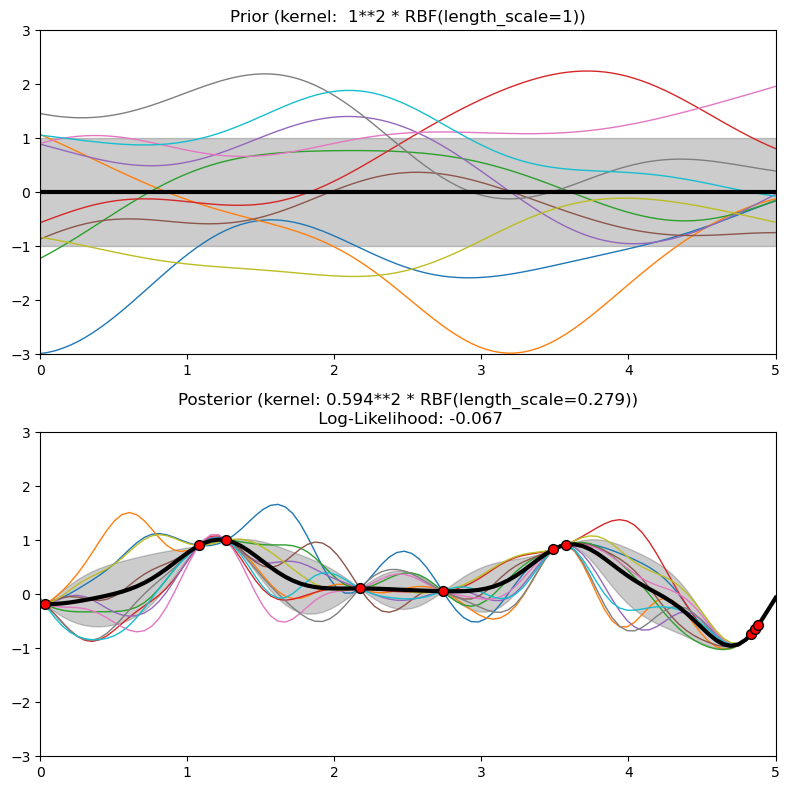

C:\Users\christoph.wuersch\.conda\envs\ML\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


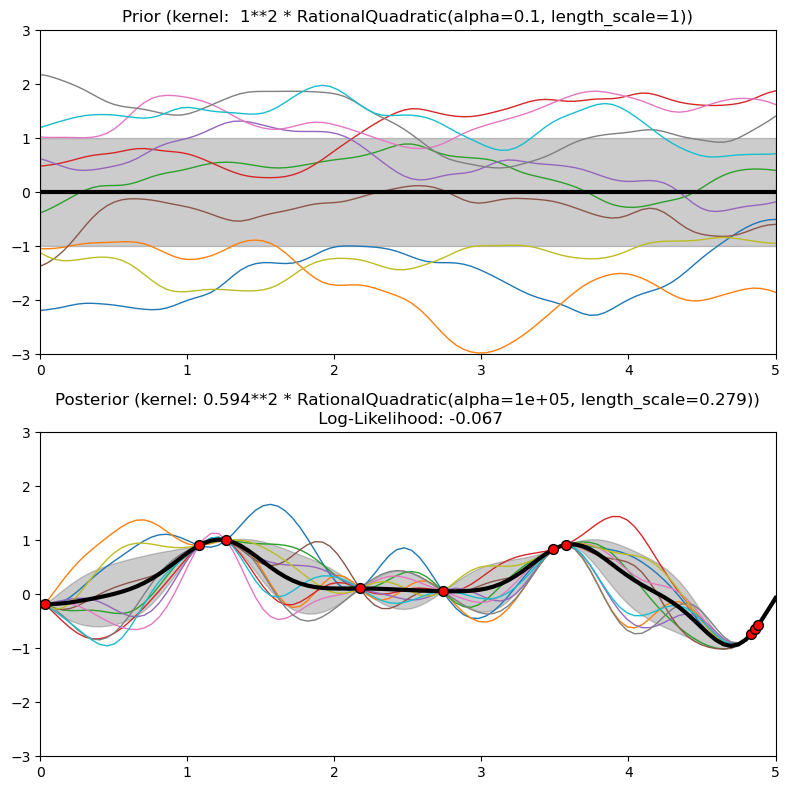

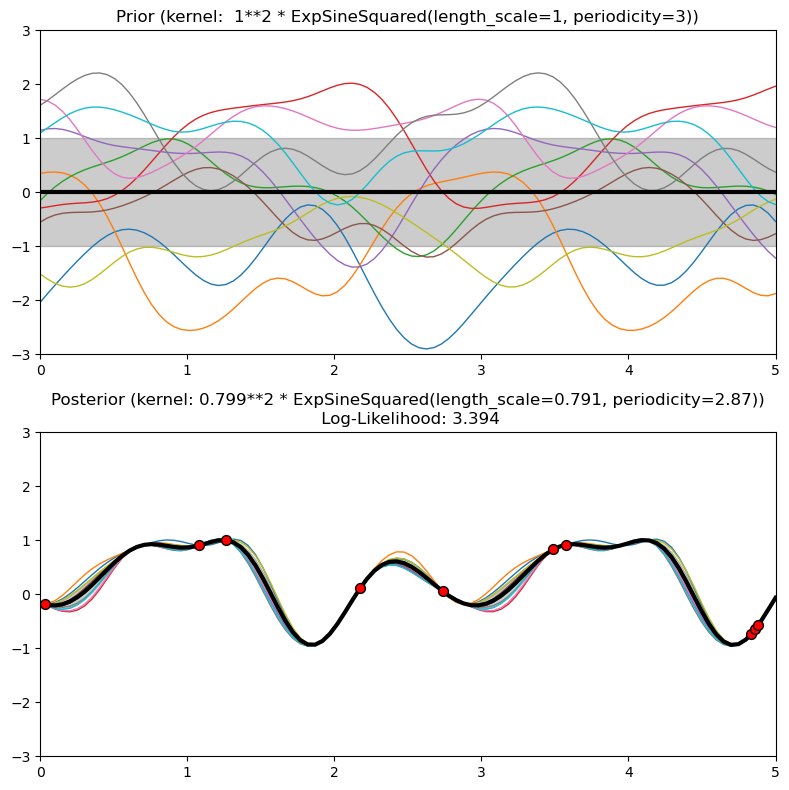

C:\Users\christoph.wuersch\.conda\envs\ML\lib\site-packages\sklearn\gaussian_process\kernels.py:335: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))
C:\Users\christoph.wuersch\.conda\envs\ML\lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


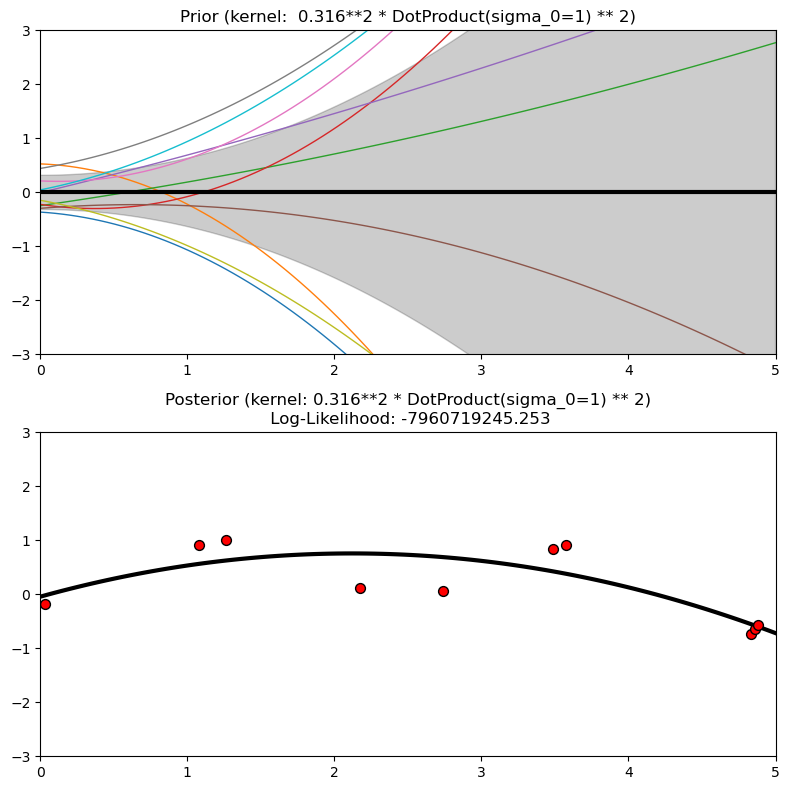

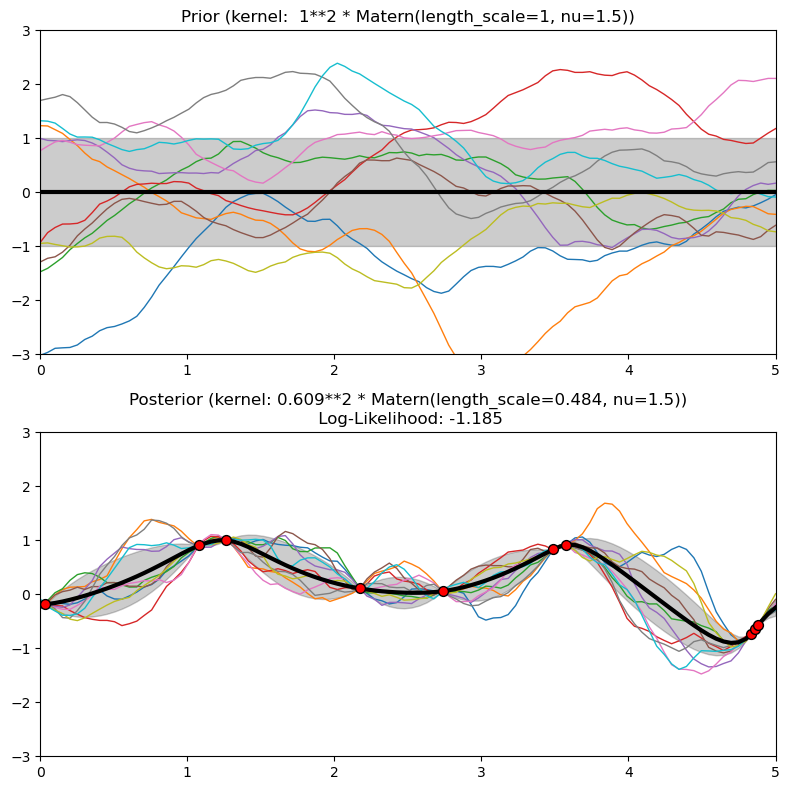

In [40]:
for fig_index, kernel in enumerate(kernels):
    
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(fig_index, figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = np.sin((X[:, 0] - 2.5) ** 2)
    gp.fit(X, y)

    # Plot posterior
    plt.subplot(2, 1, 2)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()
    plt.show()

## (b) Kernel functions

Have a look at the samples drawn from the given Gaussian processes for each kernel: RBF,
Matern, RationalQuadratic, ExpSineSquared, DotProduct and ConstantKernel. Give
an example for data that could be described by these covariance functions.

### (i) The RBF kernel (also called Squared Exponential (SE) kernel)
The radial basis function kernel or short RBF kernel is a __stationary__ kernel. __Stationary__ means, the kernel $K(x,x')=K(x-x')$ is __invariant to translations__. It is also known as the “squared exponential” kernel. It is parameterized by a length-scale parameter $\lambda$, which can either be a scalar (isotropic variant of the kernel) or a vector with the same number of dimensions as the inputs (anisotropic variant of the kernel). The kernel is given by:

$$ k(x,x')= \sigma_0^2 \exp \left[ -\frac{1}{2} \left( \frac{x-x'}{\lambda} \right)^2 \right]$$

This kernel is infinitely differentiable, which implies that $\mathcal{GP}$s with this kernel as covariance function have mean square derivatives of all orders, and __are thus very smooth__. 

__Example__: We can use it to model and predict very smooth processes or signals.

### (ii) the Rational-Quadratic kernel

The *RationalQuadratic kernel* can be seen as a scale mixture (an infinite sum) of RBF kernels with different characteristic length-scales. It is parameterized by a length-scale parameter $\lambda$ and a scale mixture parameter $\alpha$. Only the isotropic variant where $\lambda$ is a scalar is supported at the moment. The kernel is given by:


$$ k(x,x')=\left( 1 + \frac{( x-x')^2 }{2\alpha \lambda^2} \right)^{-\alpha}$$





###  (iii) the Exp-Sine-Squared kernel

The Exp-Sine-Squared kernel allows __modeling periodic functions__. It is parameterized by a length-scale parameter $\lambda$ and a periodicity parameter $p$. Only the isotropic variant where  is a scalar is supported at the moment. The kernel is given by:

$$k(x, x') = \exp \left[-\frac{ 2\cdot\sin^2  \left( \pi/ p \cdot \vert x-x' \vert \right)}{ \lambda^2}  \right]$$

__Example__: modeling periodic changes, e.g. daily temperature changes, seasonally changing quantities, such as the $\mathrm{CO}_2$ concentration.

### (iv) the Matérn kernel

The Matern kernel is a __stationary__ kernel and a generalization of the RBF kernel. It has an additional parameter $\nu$ which controls the smoothness of the resulting function. 
It is parameterized by a length-scale parameter $\lambda$ , which can either be a scalar (isotropic variant of the kernel) or a vector with the same number of dimensions as the inputs (anisotropic variant of the kernel). The kernel is given by:

$$k(x_i, x_j) = \sigma^2\frac{1}{\Gamma(\nu)2^{\nu-1}}\Bigg(\gamma\sqrt{2\nu} \frac{\vert x-x'\vert}{\lambda})\Bigg)^\nu \cdot K_\nu \Bigg(\gamma\sqrt{2\nu} \frac{\vert x-x'\vert}{\lambda})\Bigg)$$

where $K_{\nu}$ is a modified Bessel function. 
- It is __stationary and isotropic__. In the limit of $\nu \rightarrow \infty$, the matérn kernel converges to the RBF covariance function. 
- for a finite $\nu$, the matérn kernel generates much rougher sample functions
- for the special case of $\nu= \frac{1}{2}$, the kernel gets $K(x, x') = \exp \left( − \frac{ \vert x − x' \vert}{\lambda} \right)$. This is called a Ornstein-Uhlenbeck process, yielding very rough sample functions (https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process)

__Example__: modeling stock prices, random walks, non-differentiable stochastic processes

### (v) the Dot-Product kernel
The Dot-Product kernel is __non-stationary__ and can be obtained from linear regression by putting $\sim \mathcal{N}(0,1)$ priors on the coefficients of  $x_d (d=1\dots D)$ and a prior of $\sim \mathcal{N}(0,\sigma_0^2)$ on the bias. The Dot-Product kernel is invariant to a rotation of the coordinates about the origin, but not translations. It is parameterized by a parameter $\sigma_0^2$. For $\sigma_0^2=0$, the kernel is called the __homogeneous linear kernel__, otherwise it is inhomogeneous. The kernel is given by

$$ k(x,x')=\sigma_0^2 +x\cdot x'$$

The Dot-Product kernel is commonly combined with exponentiation. 

__Example__: polynomial regression

## (c) How to model a periodic signal with noise using a $\mathcal{GP}$

Kernel functions are __additive__ and __multiplicative__. To model a purely periodic process with white noise, we can construct a new kernel, consisitng of the Exp-Sine-Squared kernel plus the white noise kernel. In order to allow the model to adapt to variations of the amplitude $A$ of the periodic signal, we vary the periodic kernel using an RBF-kernel.



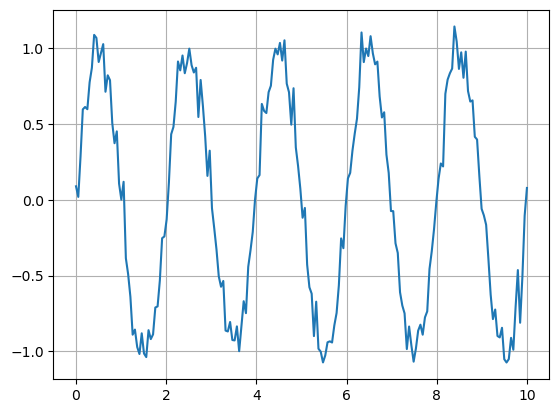

In [4]:
import numpy as np
import matplotlib.pyplot as plt


A = 1         #amplitude
p = 2         #periodicity
sigma0=0.001    #noise level
N = 200;      #number of points



noise = np.random.normal(0,0.1,N)
X=np.linspace(0,10,N)
y=A*np.sin(2*np.pi*(X/p))+noise
X=X[:, np.newaxis]
y=y[:, np.newaxis]
#generate noisy sine wave

plt.figure()
plt.plot(X,y)
plt.grid(True)




In [29]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared

# variation of the amplitude of the sine
k1 = A**2 * RBF(length_scale=30)                         
# periodic component with variable amplitude
k2 = ExpSineSquared(length_scale=20, periodicity=p)   
# noise terms
k3 = WhiteKernel(noise_level=sigma0**2)  

kernel_gpml = k1*k2 + k3


gp = GaussianProcessRegressor(kernel=kernel_gpml,
                              alpha=0.0,
                              optimizer=None,
                              normalize_y=True)
gp.fit(X, y)


GaussianProcessRegressor(alpha=0.0,
                         kernel=1**2 * RBF(length_scale=30) * ExpSineSquared(length_scale=20, periodicity=2) + WhiteKernel(noise_level=1e-06),
                         normalize_y=True, optimizer=None)

In [36]:
X_ = np.linspace(X.min(), X.max() + 10, 100)
X_ = X_[:,np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)


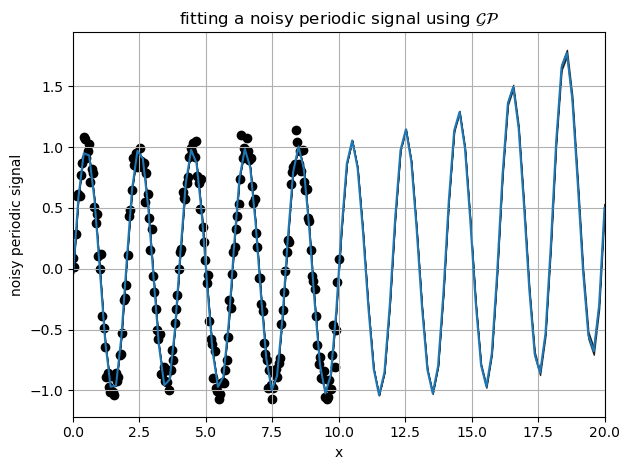

In [37]:
# Illustration
plt.scatter(X, y, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:,0], y_pred - 3*y_std,
                 y_pred + 3*y_std,
                 alpha=0.8, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("x")
plt.ylabel('noisy periodic signal')
plt.title('fitting a noisy periodic signal using $\mathcal{GP}$')
plt.tight_layout()
plt.grid(True)
plt.show()

In [18]:
np.shape(X_[:,0])

(100,)

## (d) Matérn kernel

The Matern kernel is a __stationary__ kernel and a generalization of the RBF kernel. It has an additional parameter $\nu$ which controls the smoothness of the resulting function. 
It is parameterized by a length-scale parameter $\lambda$ , which can either be a scalar (isotropic variant of the kernel) or a vector with the same number of dimensions as the inputs (anisotropic variant of the kernel). The kernel is given by:

$$k(x_i, x_j) = \sigma^2\frac{1}{\Gamma(\nu)2^{\nu-1}}\Bigg(\gamma\sqrt{2\nu} \frac{\vert x-x'\vert}{\lambda})\Bigg)^\nu \cdot K_\nu \Bigg(\gamma\sqrt{2\nu} \frac{\vert x-x'\vert}{\lambda})\Bigg)$$

where $K_{\nu}$ is a modified Bessel function. 
- It is __stationary and isotropic__. In the limit of $\nu \rightarrow \infty$, the matérn kernel converges to the RBF covariance function. 
- for a finite $\nu$, the matérn kernel generates much rougher sample functions
- for the special case of $\nu= \frac{1}{2}$, the kernel gets $K(x, x') = \exp \left( − \frac{ \vert x − x' \vert}{\lambda} \right)$. This is called a Ornstein-Uhlenbeck process, yielding very rough sample functions (https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process)

__Example__: modeling stock prices, random walks, non-differentiable stochastic processes

## Summary

We close our inspection of our Gaussian processes by pointing out some reasons why Gaussian processes are an attractive model for use in regression problems and in some cases may be preferable to alternative models (such as linear and locally-weighted linear regression):

1.  As Bayesian methods, Gaussian process models __allow one to quantify uncertainty in predictions__ resulting not just from intrinsic noise in the problem but also the errors in the parameter estimation procedure. Furthermore, many methods for model selection and hyperparameter selection in Bayesian methods are immediately applicable to Gaussian processes (though we did not address any of these advanced topics here).
2.  Like locally-weighted linear regression, Gaussian process regression is __non-parametric__ and hence can model essentially arbitrary functions of the input points.
3.  Gaussian process regression models provide a natural way to introduce __kernels into a regression modeling framework__. By careful choice of kernels, Gaussian process regression models can sometimes take advantage of structure in the data.
4. Gaussian process regression models, though perhaps somewhat tricky to understand conceptually, nonetheless lead to simple and straightforward linear algebra implementations.




## References

[1] Carl E. Rasmussen and Christopher K. I. Williams. Gaussian Processes for Machine Learning. MIT Press, 2006. Online: http://www.gaussianprocess.org/gpml/

[2] Chuong B. Do: Gaussian Processes, University of Stanford (2007)

[3] Neil D. Lawrence, Nicolas Durande: GPy introduction covariance functions, Machine Learning Summer School, Sydney, Australia (2015)
